In [1]:
import pandas as pd
mall_data = pd.read_csv("/content/Mall_Customers.csv")
mall_data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
print(mall_data.head)

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


In [3]:
print(mall_data.describe)

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


In [4]:
print(mall_data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [6]:
mall_data = mall_data.drop("CustomerID",axis=1)

In [7]:
mall_data


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


SyntaxError: ignored

In [11]:
mall_data["Gender"]=mall_data['Gender'].replace({'Male':0,'Female':1})

In [12]:
mall_data


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [13]:
mall_data=mall_data.dropna()

In [14]:
mall_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


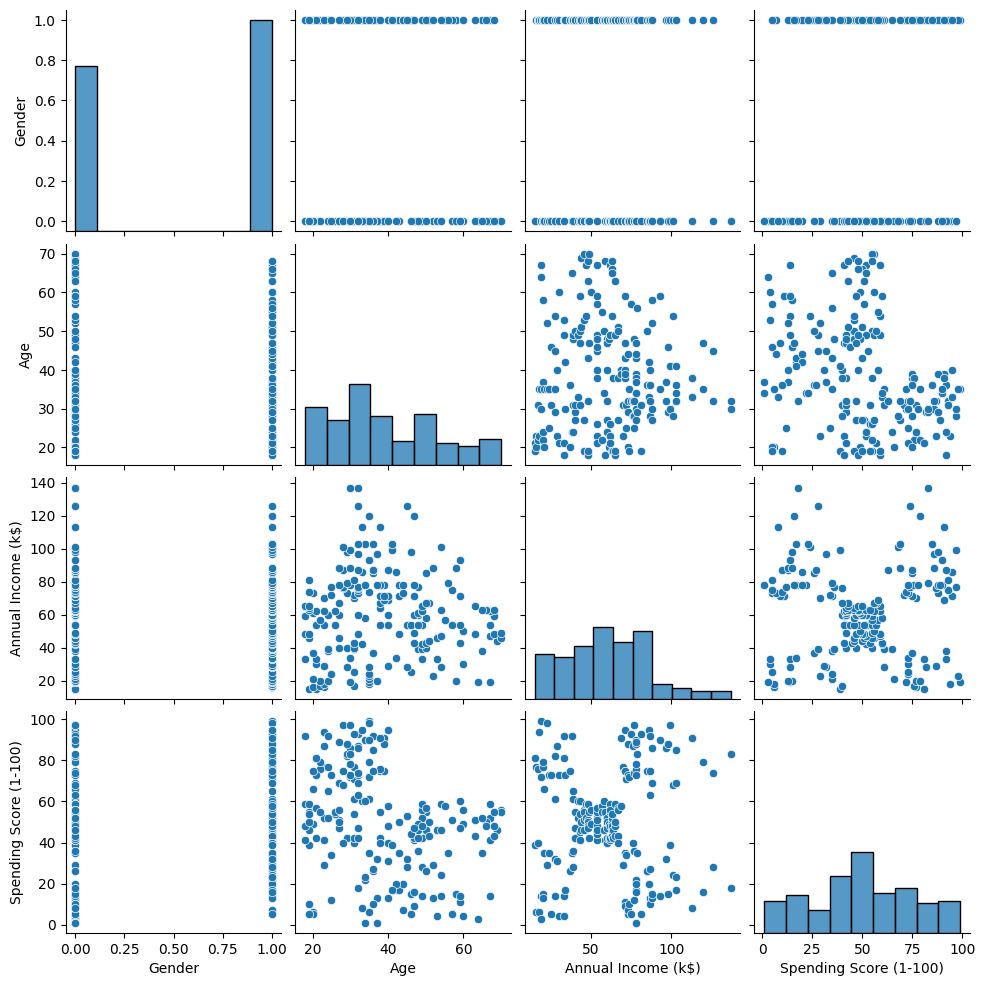

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(mall_data)
plt.show()

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
mall_data_scaled = scaler.fit_transform(mall_data)


kmeans = KMeans(n_clusters=5, random_state=42,n_init='auto')
kmeans.fit(mall_data_scaled)


mall_data["Cluster"] = kmeans.labels_


In [18]:

cluster_means = mall_data.groupby("Cluster").mean()

# display the results
print(cluster_means)


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.000000  55.903226           48.774194               38.806452
1        1.000000  28.345455           60.800000               68.654545
2        1.000000  48.720930           46.186047               39.674419
3        0.000000  28.250000           62.000000               71.675000
4        0.451613  40.419355           90.000000               15.741935
